# Analysing IPL data

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. IPL has an exclusive window in ICC Future Tours Programme

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of IPL in 2018 was US$6.3 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy

There have been twelve seasons of the IPL tournament.

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#reading the data from csv files
deliveries_df = pd.read_csv('deliveries.csv')
matches_df =  pd.read_csv('matches.csv')

In [3]:
# No. of rows and columns in each dataframe
deliveries_df.shape,matches_df.shape

((179078, 21), (756, 18))

In [4]:
#datatypes and no. of values for each columns
deliveries_df.info(),matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

(None, None)

**Top 10 run getters in IPL**

In [5]:
#Sorting data for top 10 run getters
data1 = deliveries_df[['batsman','batsman_runs']]
data1= data1.groupby('batsman').sum()
data1 = data1.sort_values('batsman_runs',ascending=False)[:10].reset_index()


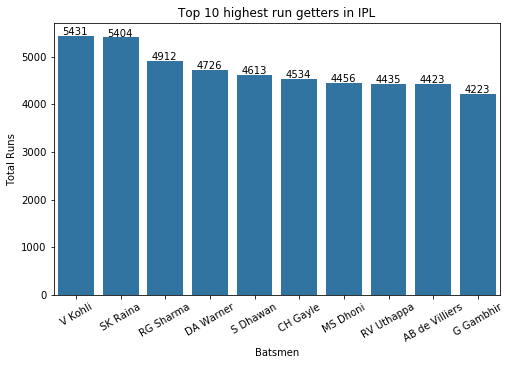

In [6]:
#Visualizing the data 
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=data1,x='batsman',y='batsman_runs',color=color);
plt.xticks(rotation=30);
plt.ylabel('Total Runs');
plt.xlabel('Batsmen');
plt.title('Top 10 highest run getters in IPL');
values = data1['batsman_runs']
for x in range(len(values)):
    plt.text(x-0.3,values[x]+15,s=values[x])

**Top 10 batsmen with highest average**

In [7]:
#Collecting and sorting data for highest average
runs = deliveries_df[['batsman','batsman_runs']].groupby('batsman').sum()
dismissals = deliveries_df.player_dismissed.value_counts().to_frame().reset_index()
dismissals.rename(columns={'index':'batsman'},inplace=True)
avg_data = pd.merge(runs,dismissals,on='batsman')
avg_data['average'] = avg_data['batsman_runs']/avg_data['player_dismissed']
avg_data= avg_data.sort_values(by='average',ascending=False)
avg_10 = avg_data[:10].reset_index()


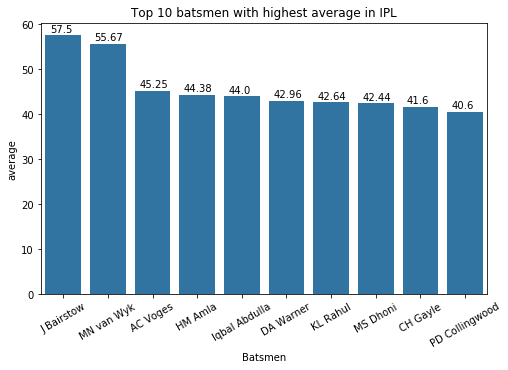

In [8]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=avg_10,x='batsman',y='average',color=color);
plt.xticks(rotation=30);
values = avg_10['average']
plt.title('Top 10 batsmen with highest average in IPL');
plt.xlabel('Batsmen');
for x in range(len(values)):
   
    plt.text(x-0.3,values[x]+.75,s=round(values[x],2))

**Players with Max no. of fifties in the IPL**

In [9]:
#Collecting and sorting data for no. of fifties
fifties = deliveries_df[['match_id','batsman','batsman_runs']]
fifties = fifties.groupby(['match_id','batsman']).sum()
fifties = fifties[(fifties.batsman_runs > 49) & (fifties.batsman_runs < 100)]
fifties = fifties.groupby('batsman').count().sort_values('batsman_runs',ascending=False).reset_index()
fifties = fifties[:10]

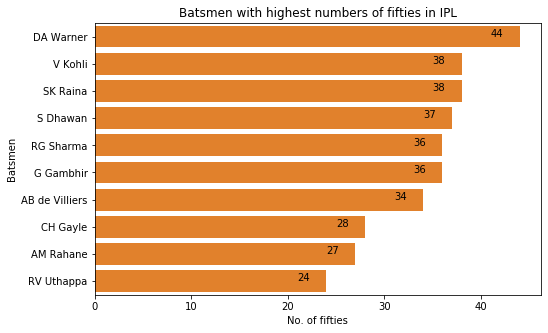

In [10]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[1]
sb.barplot(data=fifties,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('No. of fifties');
plt.title('Batsmen with highest numbers of fifties in IPL');
plt.ylabel('Batsmen');
values = fifties['batsman_runs']
for x in range(len(values)):
    plt.text(values[x]-3,x,s=values[x])

**Players with Max no of hundreds**

In [11]:
#Collecting and sorting data for no. of hundreds
hundreds = deliveries_df[['match_id','batsman','batsman_runs']]
hundreds = hundreds.groupby(['match_id','batsman']).sum()
hundreds = hundreds[hundreds.batsman_runs > 99]
hundreds = hundreds.groupby('batsman').count().sort_values('batsman_runs',ascending=False).reset_index()
hundreds = hundreds[:15]

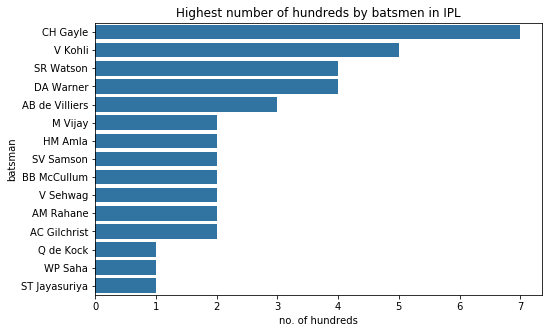

In [12]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=hundreds,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of hundreds');
plt.title('Highest number of hundreds by batsmen in IPL');

**List of Players with Most fours**

In [13]:
#Collecting and sorting data for no. of Fours

fours = deliveries_df[['batsman','batsman_runs']]
fours = fours[fours.batsman_runs == 4]
fours = fours.groupby('batsman').count()
fours =  fours.sort_values('batsman_runs',ascending=False)[:15].reset_index()

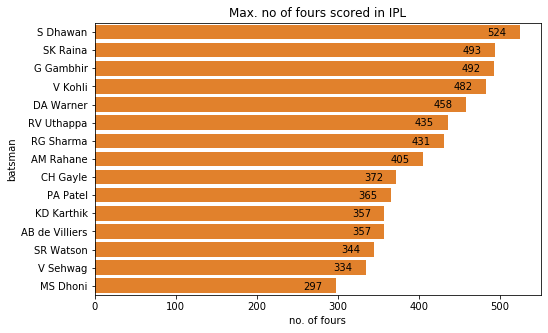

In [14]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[1]
sb.barplot(data=fours,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of fours');
plt.title('Max. no of fours scored in IPL')
values = fours['batsman_runs']
for x in range(len(values)):
    plt.text(values[x]-40,x+0.2,s=values[x])

**Top players with Most sixes**

In [15]:
#Collecting and sorting data for no. of sixes
sixes = deliveries_df[['batsman','batsman_runs']]
sixes = sixes[sixes.batsman_runs == 6]
sixes = sixes.groupby('batsman').count()
sixes =  sixes.sort_values('batsman_runs',ascending=False)[:15].reset_index()

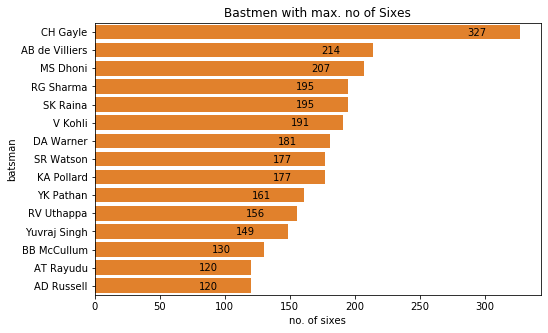

In [16]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[1]
sb.barplot(data=sixes,y='batsman',x='batsman_runs',color=color);
#plt.xticks(rotation=30);
plt.xlabel('no. of sixes');
plt.title('Bastmen with max. no of Sixes');
values = sixes['batsman_runs']
for x in range(len(values)):
    plt.text(values[x]-40,x+0.2,s=values[x])

**Top 10 wicket takers in IPL**

In [17]:
#differnt types of dismissals
deliveries_df.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [18]:
#Calculating no. of wickets for diff. bowlers
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
data2 = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
data2 = data2[['bowler','dismissal_kind']]
data2 = data2.groupby('bowler').count().sort_values('dismissal_kind',ascending=False).reset_index()[:10]


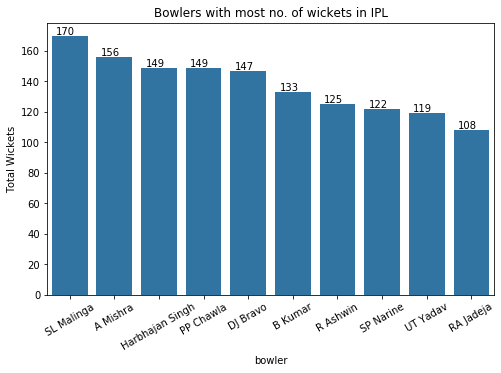

In [19]:
#Visualising the  data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=data2,x='bowler',y='dismissal_kind',color=color);
plt.xticks(rotation=30);
plt.ylabel('Total Wickets');
values = data2['dismissal_kind']
plt.title('Bowlers with most no. of wickets in IPL');
for x in range(len(values)):
    plt.text(x-0.3,values[x]+1,s=values[x])
    

**Top 10 bowlers with best average**

In [20]:
#Calculating and sorting bowler's average
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
wickets = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
wickets = wickets[['bowler','dismissal_kind']]
wickets = wickets.groupby('bowler').count()

In [21]:
#Calculating and sorting bowler's average
wickets = wickets[wickets.dismissal_kind!=0]
runs = deliveries_df[['bowler','noball_runs','wide_runs','batsman_runs']]
runs['bowler_runs']= runs['noball_runs']+runs['wide_runs']+runs['batsman_runs']
runs = runs[['bowler','bowler_runs']].groupby('bowler').sum()
bowlers_data = pd.merge(runs,wickets,on='bowler')
bowlers_data['average'] = bowlers_data['bowler_runs']/ bowlers_data['dismissal_kind']
bowlers_data = bowlers_data[bowlers_data.bowler_runs > 400]
bowlers_data= bowlers_data.sort_values(by='average')
bowlers_data = bowlers_data[:10]
bowlers_data = bowlers_data.reset_index()


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


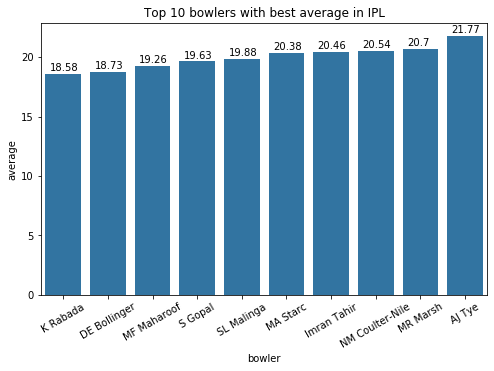

In [22]:
#Visualising the  data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=bowlers_data,x='bowler',y='average',color=color);
plt.xticks(rotation=30);
values = bowlers_data['average']
plt.title('Top 10 bowlers with best average in IPL');
for x in range(len(values)):
    plt.text(x-0.3,values[x]+0.25,s=round(values[x],2))

**Top 15 bolwers with most no. of dot balls**

In [23]:
#Calculating and sorting bowler's dot balls
dots = deliveries_df[['bowler','total_runs']]
dots = dots[dots.total_runs == 0]
dots= dots.groupby('bowler').count()
dots = dots.sort_values(by='total_runs',ascending=False)[:15].reset_index()

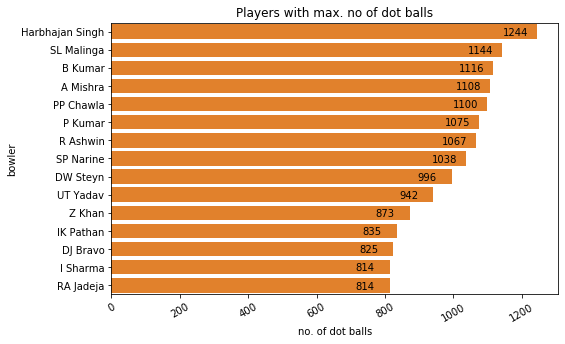

In [24]:
#Visualising the  data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[1]
sb.barplot(data=dots,y='bowler',x='total_runs',color=color);
plt.xticks(rotation=30);
plt.xlabel('no. of dot balls');
values = dots['total_runs']
plt.title('Players with max. no of dot balls');
for x in range(len(values)):
    plt.text(values[x]-100,x+0.2,s=values[x])

**Bowlers with best strike rate in IPL**

In [25]:
#Calculating and sorting data to find bowlers with best strike rate
strikerate = deliveries_df[['bowler','ball']]
strikerate = strikerate[~(strikerate.ball>6)]
strikerate = strikerate.groupby('bowler').count()

In [26]:
#Calculating and sorting data to find bowlers with best strike rate
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
wickets = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
wickets = wickets[['bowler','dismissal_kind']]
wickets = wickets.groupby('bowler').count()

In [27]:
#Calculating and sorting data to find bowlers with best strike rate and economy rate
wickets = wickets[wickets.dismissal_kind!=0]
runs = deliveries_df[['bowler','noball_runs','wide_runs','batsman_runs']]
runs['bowler_runs']= runs['noball_runs']+runs['wide_runs']+runs['batsman_runs']
runs = runs[['bowler','bowler_runs']].groupby('bowler').sum()
bowlers_data = pd.merge(runs,wickets,on='bowler')
bowlers_data['average'] = bowlers_data['bowler_runs']/ bowlers_data['dismissal_kind']
bowlers_data = bowlers_data[bowlers_data.bowler_runs > 400]
new = pd.merge(bowlers_data,strikerate,on='bowler')
new['s.rate'] = new['ball'] /new['dismissal_kind']
new['overs'] = new['ball'] / 6
new['econ'] = new['bowler_runs'] / new['overs']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
#Calculating and sorting data to find bowlers with best strike rate
strike_rate_15 = new.sort_values('s.rate')[:15].reset_index()
economy_15 = new.sort_values('econ')[:15].reset_index()

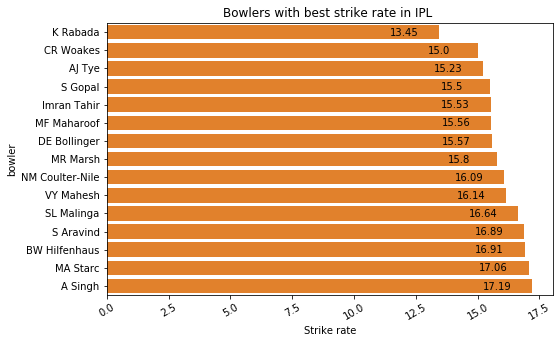

In [29]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[1]
sb.barplot(data=strike_rate_15,y='bowler',x='s.rate',color=color);
plt.xticks(rotation=30);
plt.xlabel('Strike rate');
values = strike_rate_15['s.rate']
plt.title('Bowlers with best strike rate in IPL ');
for x in range(len(values)):
    plt.text(values[x]-2,x+0.2,s=round(values[x],2))

**Bowlers with best economy rates in IPL**

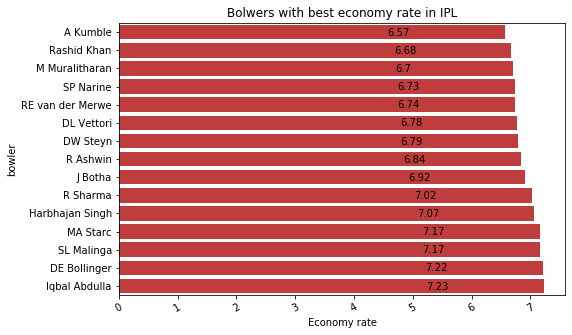

In [30]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[3]
sb.barplot(data=economy_15,y='bowler',x='econ',color=color);
plt.xticks(rotation=30);
plt.xlabel('Economy rate');
values = economy_15['econ']
plt.title('Bolwers with best economy rate in IPL');
for x in range(len(values)):
    plt.text(values[x]-2,x+0.2,s=round(values[x],2))

**Top 10 players with max no. of catches**

In [31]:
#Calculating and sorting the data for max. no of catches
catches = deliveries_df[['fielder', 'dismissal_kind']]
catches = catches[catches.dismissal_kind == 'caught']
catches = catches.groupby('fielder').count()
catches = catches.sort_values(by='dismissal_kind',ascending=False)[:10].reset_index()

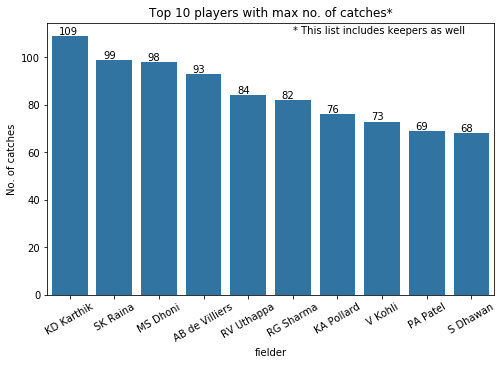

In [32]:
#Visualising the data
plt.figure(figsize=[8,5]);
color=sb.color_palette()[0]
sb.barplot(data=catches,x='fielder',y='dismissal_kind',color=color);
plt.xticks(rotation=30);
plt.text(5,110,'* This list includes keepers as well');
plt.ylabel('No. of catches');
plt.title('Top 10 players with max no. of catches*');
values = catches['dismissal_kind']
for x in range(len(values)):
    plt.text(x-.25,values[x]+0.5,s=round(values[x],2))

**Top 10 players with max. no. of MOM(Man of the Match) awards**

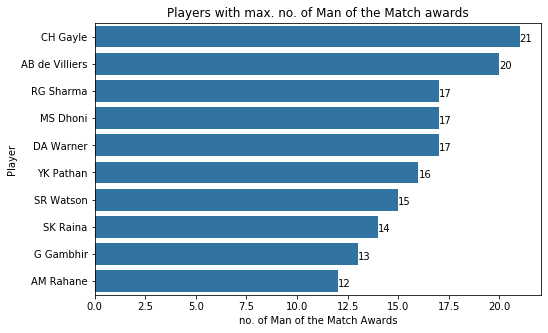

In [33]:
#Visualising the data
plt.figure(figsize=[8,5]);
color =sb.color_palette()[0]
order = matches_df['player_of_match'].value_counts()[:10].index
sb.countplot(data=matches_df,y='player_of_match',order = order,color=color);
values = matches_df['player_of_match'].value_counts()[:10].values
plt.xlabel('no. of Man of the Match Awards');\
plt.ylabel('Player');
plt.title('Players with max. no. of Man of the Match awards');
for x in range(len(values)):
    plt.text(values[x],x+0.2,s=round(values[x],2))

**No. of matches played in each season of IPL**

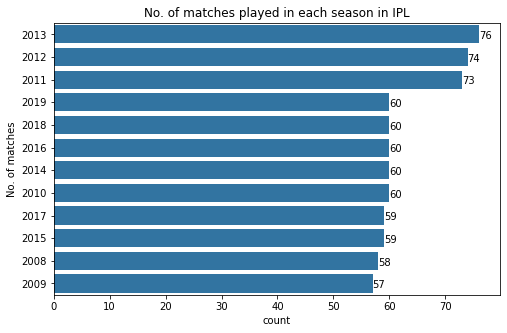

In [34]:
#Visualising the data
plt.figure(figsize=[8,5]);
color =sb.color_palette()[0]
order = matches_df['season'].value_counts().index
sb.countplot(data=matches_df,y='season',order = order,color=color);
values = matches_df['season'].value_counts().values
plt.ylabel('No. of matches');
plt.title('No. of matches played in each season in IPL');
for x in range(len(values)):
    plt.text(values[x],x+0.2,s=round(values[x],2))

**No. of matches won by each team in whole IPL**

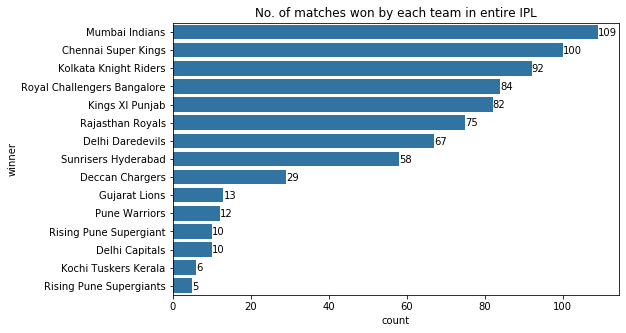

In [35]:
#Visualising the data
plt.figure(figsize=[8,5]);
color =sb.color_palette()[0]
order = matches_df['winner'].value_counts().index
sb.countplot(data=matches_df,y='winner',order = order,color=color);
values = matches_df['winner'].value_counts().values
plt.title('No. of matches won by each team in entire IPL');
for x in range(len(values)):
    plt.text(values[x],x+0.2,s=round(values[x],2))

**Winning percentage of each team**

In [36]:
#Calculating and sorting data to find winning percentage of each team in IPL
set1= matches_df['team1'].value_counts().to_frame().reset_index()
set2= matches_df['team2'].value_counts().to_frame().reset_index()
total = pd.merge(set1,set2,on='index')
total['played'] = total['team1']+total['team2']
total = total[total.played>50]

In [37]:
#Calculating and sorting data to find winning percentage of each team in IPL
values = matches_df['winner'].value_counts().to_frame().reset_index()
win_pct = pd.merge(values,total,on='index')
win_pct.drop(labels=['team1','team2'],axis=1,inplace=True)
win_pct['percentage']= round((win_pct['winner'] / win_pct['played'])*100,2)
win_pct= win_pct.sort_values('percentage',ascending=False)
values = win_pct['percentage'].values

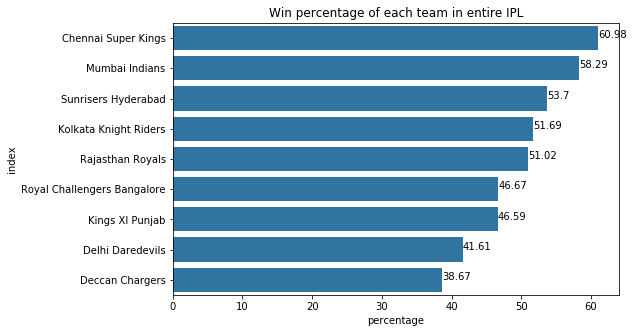

In [38]:
plt.figure(figsize=[8,5]);
color =sb.color_palette()[0]
sb.barplot(data=win_pct,x='percentage',y='index',color=color);
plt.title('Win percentage of each team in entire IPL');
for x in range(len(values)):
    plt.text(values[x],x,s=values[x])

**Team's decisions after winning the toss over years**

In [39]:
#Finding team's decisions after the toss
matches_df.toss_decision.value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

The above stat says that most of the times team **chose to field  first** after winning the toss when compared with batting first.

Let's try to break and see the trend for different years

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 360x360 with 0 Axes>

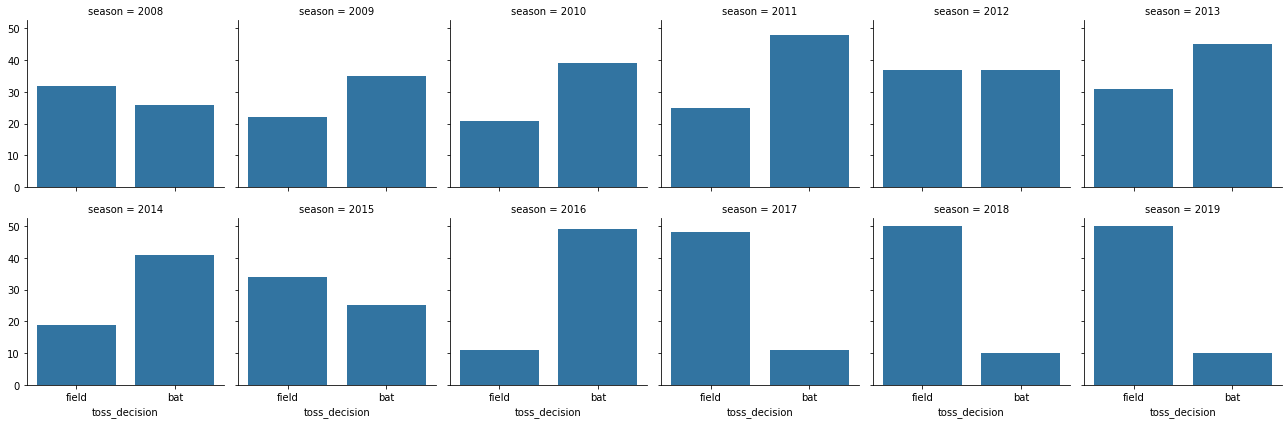

In [40]:
#visualising the data
plt.figure(figsize=[5,5]);
g=sb.FacetGrid(data=matches_df,col='season',col_wrap=6);
g.map(sb.countplot,'toss_decision');

The above graph gives some intresting trends over the years.
1. During **2017-2019**, most teams have opted to **field first** after winning toss and the ratio seems to be much larger while comparing with other years 

2. Surprisingly in **2016**, teams have opted to **bat first** after winning the toss and ratio is higher while comparing to other years 

**Does the toss winner has a bigger advantage in winning the match**

In [41]:
#calcualting match status of toss winning team
matches_df['toss_decision_status'] = np.where((matches_df['toss_winner']==matches_df['winner']),'won','loss')

<Figure size 720x360 with 0 Axes>

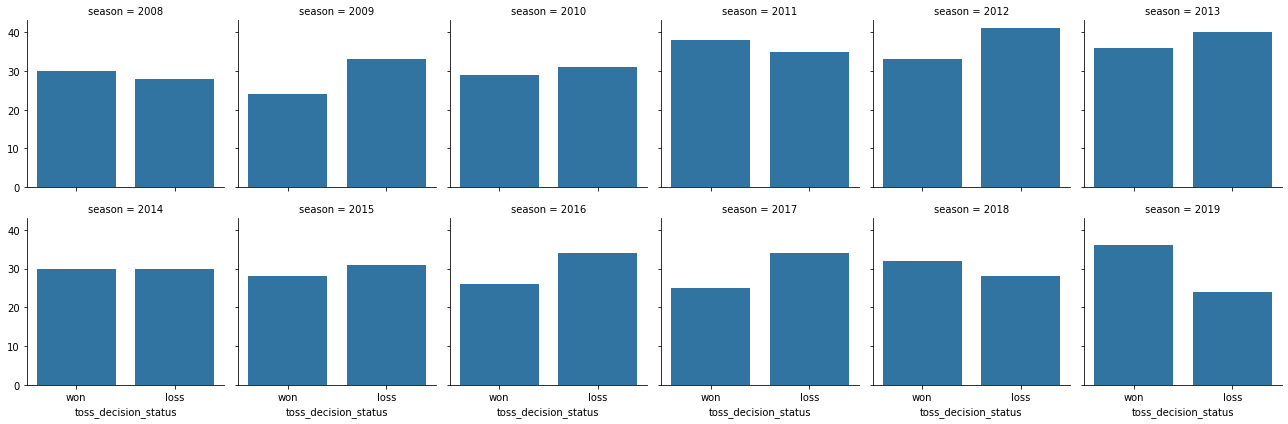

In [42]:
#Visualising the data
plt.figure(figsize=[10,5]);
g=sb.FacetGrid(data=matches_df,col='season',col_wrap=6);
g.map(sb.countplot,'toss_decision_status');

The above graph states that in **2019** ,most teams that had ***won the toss*** had went on to **win the match** when comparing  with other years.

There doesn't seem to be a major difference in other years where it shows that team after winning the toss had won/lost on almost equal propotion.

**Relationship between dot balls and no.of wickets**

In [43]:
#Calculating data to find relationship between dotballs and no. of wickets
dot_balls = deliveries_df[['bowler','total_runs']]
dot_balls = dot_balls[dot_balls.total_runs == 0]
dot_balls= dot_balls.groupby('bowler').count()
dot_balls = dot_balls.sort_values(by='total_runs',ascending=False).reset_index()

In [44]:
#Calculating data to find relationship between dotballs and no. of wickets
other_modes =['run out','retired hurt','hit wicket','obstructing the field']
wickets = deliveries_df[~deliveries_df.dismissal_kind.isin(other_modes)]
wickets = wickets[['bowler','dismissal_kind']]
wickets = wickets.groupby('bowler').count().sort_values('dismissal_kind',ascending=False).reset_index()


In [45]:
#merging both datagroups
comp1 = pd.merge(dot_balls,wickets,on='bowler')

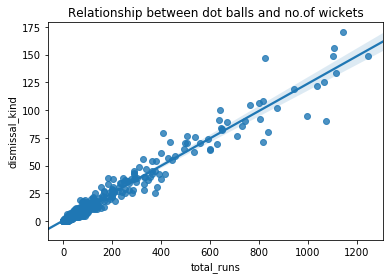

In [46]:
#visulalising the data
sb.regplot(data=comp1,x='total_runs',y='dismissal_kind')
plt.title('Relationship between dot balls and no.of wickets');

In [47]:
#Correlation coefficient value
comp1['total_runs'].corr(comp1['dismissal_kind'])

0.9769740815560797

Looking at the above plot and the correlation co-efficient value(0.977), we could say that there is a **strong linear relationship** between the **number of dot balls and no. of wickets for a bowler**.  i.e If a bowler bowls many dot balls, he is expected to take many wickets as well

**Relationship between average and strike rate**

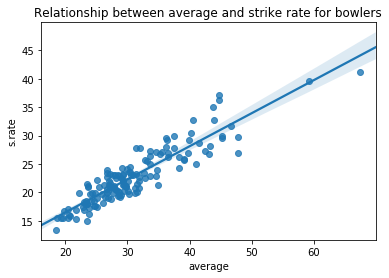

In [48]:
#visualising  the data
sb.regplot(data=new,x='average',y='s.rate');
plt.title('Relationship between average and strike rate for bowlers');

In [49]:
new['average'].corr(new['s.rate'])

0.9110566581532399

The above plot and the corr value(0.91) suggests that there is a **strong linear relationship** between **average and strike rate** for bowlers. i.e If average number of balls bowled per wicket taken(strike rate) for a bowler is higher , then the bowler will also have a higher runs conceeded per wicket(average)



**Relationship between economy rate and strike rate**

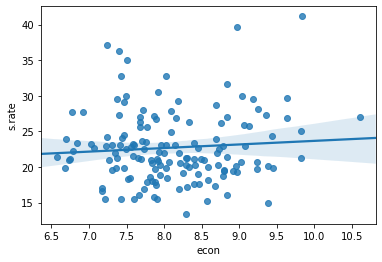

In [50]:
#Visualising the data
sb.regplot(data=new,x='econ',y='s.rate');


In [51]:
#Corr value
new['econ'].corr(new['s.rate'])

0.07898615799556055

The above plot and correlation co-efficient value(~0) suggests that there is no relation between **economy rate and strike rate** for a bowler

Economy rate - average number of runs conceded for each over bowled

Strike rate - average number of balls bowled per wicket taken